In [127]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import os
import seaborn as sns
%matplotlib inline

In [128]:
load_dotenv()

True

In [129]:
#client_id = os.getenv("SPOTIFY_CLIENT_ID")
#client_secret = os.getenv("SPOTIFY_CLIENT_SECRET")

# Authentication - without user
#client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
#client_credentials_manager = SpotifyClientCredentials(client_id="a080deba78814d74b327a97575b38407", client_secret="51b57ebf29f247e09a1726200f98a97e")
#sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [130]:
# Read in the data and create a dataframe
#data = pd.read_csv('../Data/song_data(pop-artist).csv',nrows=100)
data = pd.read_csv('../Data/song_data(pop-artist).csv')
df = pd.DataFrame(data)
df

Unnamed: 0                      id  \
0              0  7zgqtptZvhf8GEmdsM2vp2   
1              1  4Vxu50qVrQcycjRyJQaZLC   
2              2  6b8Be6ljOzmkOmFslEb23P   
3              3  0afhq8XCExXpqazXczTSve   
4              4  1HNkqx9Ahdgi1Ixy2xkKkL   
...          ...                     ...   
9918        9918  4UFlPCB4THnQ9TlPHqIQow   
9919        9919  5pSSEkT0963muzzIjsVkrs   
9920        9920  7gC6Rbllqf1yXNC02e5jz2   
9921        9921  6Ff77WXC58MkhLE5A1qgY1   
9922        9922  1is5wwajEk2JW7Nsd63r3m   

                                                  title   all_artists  \
0                                      ...Ready For It?  Taylor Swift   
1                                          Life Changes  Thomas Rhett   
2                                             24K Magic    Bruno Mars   
3                                           Galway Girl    Ed Sheeran   
4                                            Photograph    Ed Sheeran   
...                                                 ...           ...   
9918          Funeral For A Friend / Love Lies Bleeding    Elton John   
9919                                    Fool's Overture    Supertramp   
9920               Heart of the Sunrise - 2003 Remaster           Yes   
9921  Venus And Mars / Rock Show / Jet - Live / Rema...         Wings   
9922                                     Mr. Brightside   The Killers   

      popularity_artist  popularity_song release_date  danceability  energy  \
0                    92                0   2017-09-03         0.615   0.779   
1                    74               63   2017-09-08         0.687   0.845   
2                    87               78   2016-11-17         0.818   0.803   
3                    91               77   2017-03-03         0.624   0.876   
4                    91               83   2014-06-21         0.614   0.379   
...                 ...              ...          ...           ...     ...   
9918                 82                0   1973-10-05         0.410   0.761   
9919                 67               52   1977-01-01         0.406   0.306   
9920                 59               45   1971-11-26         0.362   0.507   
9921                 69                0   1976-12-10         0.331   0.733   
9922                 76                0   2004-06-15         0.342   0.932   

      key  loudness  mode  acousticness  instrumentalness  liveness  valence  \
0       2    -6.454     1       0.06650          0.000000    0.1550    0.453   
1       7    -4.370     1       0.10000          0.000000    0.0452    0.809   
2       1    -4.282     1       0.03400          0.000000    0.1530    0.632   
3       9    -3.374     1       0.07350          0.000000    0.3270    0.781   
4       4   -10.480     1       0.60700          0.000464    0.0986    0.201   
...   ...       ...   ...           ...               ...       ...      ...   
9918    9    -8.507     0       0.01980          0.084700    0.2470    0.193   
9919    3   -10.482     1       0.31300          0.007900    0.0727    0.073   
9920    1   -11.229     1       0.01740          0.216000    0.1130    0.456   
9921    2    -8.671     1       0.08870          0.001740    0.9470    0.380   
9922    1    -3.644     1       0.00106          0.000000    0.0938    0.226   

        tempo  duration_ms  time_signature  
0     160.000       208198               4  
1      87.972       190227               4  
2     106.970       225983               4  
3      99.943       170827               4  
4     107.989       258987               4  
...       ...          ...             ...  
9918  138.712       666572               4  
9919  135.272       652560               4  
9920  146.641       634440               3  
9921  128.512       620747               4  
9922  148.148       222107               4  

[9923 rows x 19 columns]

In [131]:
# remove records where popularity_song is 0
df = df[df.popularity_song > 0]
df

Unnamed: 0                      id  \
1              1  4Vxu50qVrQcycjRyJQaZLC   
2              2  6b8Be6ljOzmkOmFslEb23P   
3              3  0afhq8XCExXpqazXczTSve   
4              4  1HNkqx9Ahdgi1Ixy2xkKkL   
5              5  0ofbQMrRDsUaVKq2mGLEAb   
...          ...                     ...   
9915        9915  7odcDCEpJdzycpucqGK3mj   
9916        9916  4OjKHySJHstsImlUW3qfml   
9917        9917  7xBXbeQkcVeOELZgGa705e   
9919        9919  5pSSEkT0963muzzIjsVkrs   
9920        9920  7gC6Rbllqf1yXNC02e5jz2   

                                     title   all_artists  popularity_artist  \
1                             Life Changes  Thomas Rhett                 74   
2                                24K Magic    Bruno Mars                 87   
3                              Galway Girl    Ed Sheeran                 91   
4                               Photograph    Ed Sheeran                 91   
5                Havana (feat. Young Thug)    Young Thug                 83   
...                                    ...           ...                ...   
9915            Remember the Future, Pt. 2        Nektar                 31   
9916          Alice's Restaurant Massacree  Arlo Guthrie                 44   
9917            Remember the Future, Pt. 1        Nektar                 31   
9919                       Fool's Overture    Supertramp                 67   
9920  Heart of the Sunrise - 2003 Remaster           Yes                 59   

      popularity_song release_date  danceability  energy  key  loudness  mode  \
1                  63   2017-09-08         0.687   0.845    7    -4.370     1   
2                  78   2016-11-17         0.818   0.803    1    -4.282     1   
3                  77   2017-03-03         0.624   0.876    9    -3.374     1   
4                  83   2014-06-21         0.614   0.379    4   -10.480     1   
5                   1   2017-08-03         0.768   0.517    7    -4.323     0   
...               ...          ...           ...     ...  ...       ...   ...   
9915               18   1973-11-13         0.435   0.583    4   -12.894     0   
9916               48   1967-08-28         0.561   0.366    9   -14.140     1   
9917               25   1973-11-13         0.391   0.590    9   -13.622     1   
9919               52   1977-01-01         0.406   0.306    3   -10.482     1   
9920               45   1971-11-26         0.362   0.507    1   -11.229     1   

      acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
1           0.1000          0.000000    0.0452    0.809   87.972       190227   
2           0.0340          0.000000    0.1530    0.632  106.970       225983   
3           0.0735          0.000000    0.3270    0.781   99.943       170827   
4           0.6070          0.000464    0.0986    0.201  107.989       258987   
5           0.1860          0.000038    0.1040    0.418  104.992       216897   
...            ...               ...       ...      ...      ...          ...   
9915        0.4780          0.114000    0.1120    0.347  109.866      1140973   
9916        0.8510          0.000000    0.8130    0.646   78.659      1116933   
9917        0.6760          0.553000    0.0661    0.479  113.675      1001120   
9919        0.3130          0.007900    0.0727    0.073  135.272       652560   
9920        0.0174          0.216000    0.1130    0.456  146.641       634440   

      time_signature  
1                  4  
2                  4  
3                  4  
4                  4  
5                  4  
...              ...  
9915               4  
9916               4  
9917               4  
9919               4  
9920               3  

[6600 rows x 19 columns]

In [132]:
# check NA values from title
df['title'].isnull().sum()

0

In [133]:
df['id'].value_counts()

4wFUdSCer8bdQsrp1M90sa    2
5aj0xPGiEUN3aI2oOYu14S    2
6rqxivjFHp8K0yMiefG56g    2
3VlbOrM6nYPprVvzBZllE5    2
1Cj2vqUwlJVG27gJrun92y    2
                         ..
1jS7v1W7iS5ND9IYqfOxWo    1
20ORwCJusz4KS2PbTPVNKo    1
1nF3YJyrdZkImSLSpaectg    1
5T8EDUDqKcs6OSOwEsfqG7    1
7gC6Rbllqf1yXNC02e5jz2    1
Name: id, Length: 6590, dtype: int64

In [134]:
df['title'].value_counts()

Home                                     7
Drive                                    6
Animals                                  5
Down                                     5
Dreams                                   5
                                        ..
Help Me Help You (feat. Why Don't We)    1
Outta My Hair                            1
Only You (with Little Mix)               1
breathin                                 1
Heart of the Sunrise - 2003 Remaster     1
Name: title, Length: 6022, dtype: int64

In [135]:
df['all_artists'].value_counts()

Taylor Swift         134
Lacuna Coil           58
Twenty One Pilots     45
Green Day             45
Muse                  45
                    ... 
Creed                  1
Brand New              1
Rayvon                 1
The Ataris             1
Arlo Guthrie           1
Name: all_artists, Length: 2680, dtype: int64

In [136]:
# Drop unnecessary columns; unnamed
df = df.drop(columns=['Unnamed: 0'])
df.head()

id                      title   all_artists  \
1  4Vxu50qVrQcycjRyJQaZLC               Life Changes  Thomas Rhett   
2  6b8Be6ljOzmkOmFslEb23P                  24K Magic    Bruno Mars   
3  0afhq8XCExXpqazXczTSve                Galway Girl    Ed Sheeran   
4  1HNkqx9Ahdgi1Ixy2xkKkL                 Photograph    Ed Sheeran   
5  0ofbQMrRDsUaVKq2mGLEAb  Havana (feat. Young Thug)    Young Thug   

   popularity_artist  popularity_song release_date  danceability  energy  key  \
1                 74               63   2017-09-08         0.687   0.845    7   
2                 87               78   2016-11-17         0.818   0.803    1   
3                 91               77   2017-03-03         0.624   0.876    9   
4                 91               83   2014-06-21         0.614   0.379    4   
5                 83                1   2017-08-03         0.768   0.517    7   

   loudness  mode  acousticness  instrumentalness  liveness  valence    tempo  \
1    -4.370     1        0.1000          0.000000    0.0452    0.809   87.972   
2    -4.282     1        0.0340          0.000000    0.1530    0.632  106.970   
3    -3.374     1        0.0735          0.000000    0.3270    0.781   99.943   
4   -10.480     1        0.6070          0.000464    0.0986    0.201  107.989   
5    -4.323     0        0.1860          0.000038    0.1040    0.418  104.992   

   duration_ms  time_signature  
1       190227               4  
2       225983               4  
3       170827               4  
4       258987               4  
5       216897               4

In [137]:
# Create a list of all the artists
artists = df['all_artists'].tolist()
#print(artists)

In [138]:
# Describe the features
df_describe = df.describe()
df_describe.head(10)

popularity_artist  popularity_song  danceability       energy  \
count        6600.000000      6600.000000   6600.000000  6600.000000   
mean           63.080152        48.516364      0.571883     0.666534   
std            17.238109        19.613890      0.165417     0.219595   
min             0.000000         1.000000      0.000000     0.000000   
25%            55.000000        37.000000      0.469000     0.536000   
50%            66.000000        51.000000      0.585000     0.712000   
75%            75.000000        64.000000      0.689000     0.838000   
max           100.000000        88.000000      0.980000     1.000000   

               key     loudness         mode  acousticness  instrumentalness  \
count  6600.000000  6600.000000  6600.000000   6600.000000       6600.000000   
mean      5.246818    -7.366078     0.664697      0.219285          0.083560   
std       3.573931     4.322217     0.472132      0.276974          0.228501   
min       0.000000   -44.907000     0.000000      0.000000          0.000000   
25%       2.000000    -8.584250     0.000000      0.013400          0.000000   
50%       5.000000    -6.239000     1.000000      0.083900          0.000014   
75%       9.000000    -4.744000     1.000000      0.334250          0.003775   
max      11.000000    -0.716000     1.000000      0.995000          0.999000   

          liveness      valence        tempo   duration_ms  time_signature  
count  6600.000000  6600.000000  6600.000000  6.600000e+03     6600.000000  
mean      0.186554     0.484610   120.547484  2.804095e+05        3.942879  
std       0.155939     0.246824    28.266113  3.689502e+05        0.348065  
min       0.000000     0.000000     0.000000  1.001720e+05        0.000000  
25%       0.093600     0.289000    99.928750  1.975422e+05        4.000000  
50%       0.123000     0.481000   119.974000  2.238800e+05        4.000000  
75%       0.229000     0.677000   138.179500  2.594130e+05        4.000000  
max       0.981000     0.981000   214.419000  6.000295e+06        5.000000

In [139]:
type(df_describe)

pandas.core.frame.DataFrame

We can say that a song with a popularity score falling in 25% breacket will be a hit.

In [140]:
# Create a copy of the main dataframe df and perform all data cleansing operations on copied dataframe
df_copy = df.copy()

In [141]:
df_copy.head()

id                      title   all_artists  \
1  4Vxu50qVrQcycjRyJQaZLC               Life Changes  Thomas Rhett   
2  6b8Be6ljOzmkOmFslEb23P                  24K Magic    Bruno Mars   
3  0afhq8XCExXpqazXczTSve                Galway Girl    Ed Sheeran   
4  1HNkqx9Ahdgi1Ixy2xkKkL                 Photograph    Ed Sheeran   
5  0ofbQMrRDsUaVKq2mGLEAb  Havana (feat. Young Thug)    Young Thug   

   popularity_artist  popularity_song release_date  danceability  energy  key  \
1                 74               63   2017-09-08         0.687   0.845    7   
2                 87               78   2016-11-17         0.818   0.803    1   
3                 91               77   2017-03-03         0.624   0.876    9   
4                 91               83   2014-06-21         0.614   0.379    4   
5                 83                1   2017-08-03         0.768   0.517    7   

   loudness  mode  acousticness  instrumentalness  liveness  valence    tempo  \
1    -4.370     1        0.1000          0.000000    0.0452    0.809   87.972   
2    -4.282     1        0.0340          0.000000    0.1530    0.632  106.970   
3    -3.374     1        0.0735          0.000000    0.3270    0.781   99.943   
4   -10.480     1        0.6070          0.000464    0.0986    0.201  107.989   
5    -4.323     0        0.1860          0.000038    0.1040    0.418  104.992   

   duration_ms  time_signature  
1       190227               4  
2       225983               4  
3       170827               4  
4       258987               4  
5       216897               4

In [142]:
popularity_threshold = df_describe.iloc[6:7,1:2]
print(popularity_threshold)

     popularity_song
75%             64.0


In [143]:
popularity_threshold.dtypes

popularity_song    float64
dtype: object

In [144]:
# add new column hit_prediction to the df_copy dataframe and fill values for each song to be 1 (represents a hit) OR to be 0 (represents a not hit). This is done by checking popularity is greater than OR leass than 57.
prediction = []
for value in df_copy['popularity_song']:
    if value >= popularity_threshold.values:
#        print(f"If loop: {value}")
        prediction.append(1)
    else:
#        print(f"Else loop: {value}")
        prediction.append(0)
df_copy['hit_prediction'] = prediction

In [145]:
df_copy

id                                 title  \
1     4Vxu50qVrQcycjRyJQaZLC                          Life Changes   
2     6b8Be6ljOzmkOmFslEb23P                             24K Magic   
3     0afhq8XCExXpqazXczTSve                           Galway Girl   
4     1HNkqx9Ahdgi1Ixy2xkKkL                            Photograph   
5     0ofbQMrRDsUaVKq2mGLEAb             Havana (feat. Young Thug)   
...                      ...                                   ...   
9915  7odcDCEpJdzycpucqGK3mj            Remember the Future, Pt. 2   
9916  4OjKHySJHstsImlUW3qfml          Alice's Restaurant Massacree   
9917  7xBXbeQkcVeOELZgGa705e            Remember the Future, Pt. 1   
9919  5pSSEkT0963muzzIjsVkrs                       Fool's Overture   
9920  7gC6Rbllqf1yXNC02e5jz2  Heart of the Sunrise - 2003 Remaster   

       all_artists  popularity_artist  popularity_song release_date  \
1     Thomas Rhett                 74               63   2017-09-08   
2       Bruno Mars                 87               78   2016-11-17   
3       Ed Sheeran                 91               77   2017-03-03   
4       Ed Sheeran                 91               83   2014-06-21   
5       Young Thug                 83                1   2017-08-03   
...            ...                ...              ...          ...   
9915        Nektar                 31               18   1973-11-13   
9916  Arlo Guthrie                 44               48   1967-08-28   
9917        Nektar                 31               25   1973-11-13   
9919    Supertramp                 67               52   1977-01-01   
9920           Yes                 59               45   1971-11-26   

      danceability  energy  key  loudness  mode  acousticness  \
1            0.687   0.845    7    -4.370     1        0.1000   
2            0.818   0.803    1    -4.282     1        0.0340   
3            0.624   0.876    9    -3.374     1        0.0735   
4            0.614   0.379    4   -10.480     1        0.6070   
5            0.768   0.517    7    -4.323     0        0.1860   
...            ...     ...  ...       ...   ...           ...   
9915         0.435   0.583    4   -12.894     0        0.4780   
9916         0.561   0.366    9   -14.140     1        0.8510   
9917         0.391   0.590    9   -13.622     1        0.6760   
9919         0.406   0.306    3   -10.482     1        0.3130   
9920         0.362   0.507    1   -11.229     1        0.0174   

      instrumentalness  liveness  valence    tempo  duration_ms  \
1             0.000000    0.0452    0.809   87.972       190227   
2             0.000000    0.1530    0.632  106.970       225983   
3             0.000000    0.3270    0.781   99.943       170827   
4             0.000464    0.0986    0.201  107.989       258987   
5             0.000038    0.1040    0.418  104.992       216897   
...                ...       ...      ...      ...          ...   
9915          0.114000    0.1120    0.347  109.866      1140973   
9916          0.000000    0.8130    0.646   78.659      1116933   
9917          0.553000    0.0661    0.479  113.675      1001120   
9919          0.007900    0.0727    0.073  135.272       652560   
9920          0.216000    0.1130    0.456  146.641       634440   

      time_signature  hit_prediction  
1                  4               0  
2                  4               1  
3                  4               1  
4                  4               1  
5                  4               0  
...              ...             ...  
9915               4               0  
9916               4               0  
9917               4               0  
9919               4               0  
9920               3               0  

[6600 rows x 19 columns]

In [146]:
df_copy.dtypes

id                    object
title                 object
all_artists           object
popularity_artist      int64
popularity_song        int64
release_date          object
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
time_signature         int64
hit_prediction         int64
dtype: object

In [147]:
df_copy['hit_prediction'].value_counts()

0    4947
1    1653
Name: hit_prediction, dtype: int64

In [148]:
# from sklearn.svm import SVC 

# model = SVC(kernel='poly',verbose=True, random_state=20)
# model.fit(x_train, y_train)
# predictions = model.predict(x_test)

In [149]:
# SVM requires numerical data. all_artists column has non numerical data, hence using one of the label encoding methos named "Frequency Encoding", values have been converted to be numeric.
#fe = df_copy.groupby('all_artists').size()/len(df_copy)

In [150]:
#df_copy.loc[:,'all_artists_freq_encode'] = df_copy['all_artists'].map(fe)

In [151]:
#df_copy

In [152]:
df_copy_split = df_copy.copy()
df_copy_split

id                                 title  \
1     4Vxu50qVrQcycjRyJQaZLC                          Life Changes   
2     6b8Be6ljOzmkOmFslEb23P                             24K Magic   
3     0afhq8XCExXpqazXczTSve                           Galway Girl   
4     1HNkqx9Ahdgi1Ixy2xkKkL                            Photograph   
5     0ofbQMrRDsUaVKq2mGLEAb             Havana (feat. Young Thug)   
...                      ...                                   ...   
9915  7odcDCEpJdzycpucqGK3mj            Remember the Future, Pt. 2   
9916  4OjKHySJHstsImlUW3qfml          Alice's Restaurant Massacree   
9917  7xBXbeQkcVeOELZgGa705e            Remember the Future, Pt. 1   
9919  5pSSEkT0963muzzIjsVkrs                       Fool's Overture   
9920  7gC6Rbllqf1yXNC02e5jz2  Heart of the Sunrise - 2003 Remaster   

       all_artists  popularity_artist  popularity_song release_date  \
1     Thomas Rhett                 74               63   2017-09-08   
2       Bruno Mars                 87               78   2016-11-17   
3       Ed Sheeran                 91               77   2017-03-03   
4       Ed Sheeran                 91               83   2014-06-21   
5       Young Thug                 83                1   2017-08-03   
...            ...                ...              ...          ...   
9915        Nektar                 31               18   1973-11-13   
9916  Arlo Guthrie                 44               48   1967-08-28   
9917        Nektar                 31               25   1973-11-13   
9919    Supertramp                 67               52   1977-01-01   
9920           Yes                 59               45   1971-11-26   

      danceability  energy  key  loudness  mode  acousticness  \
1            0.687   0.845    7    -4.370     1        0.1000   
2            0.818   0.803    1    -4.282     1        0.0340   
3            0.624   0.876    9    -3.374     1        0.0735   
4            0.614   0.379    4   -10.480     1        0.6070   
5            0.768   0.517    7    -4.323     0        0.1860   
...            ...     ...  ...       ...   ...           ...   
9915         0.435   0.583    4   -12.894     0        0.4780   
9916         0.561   0.366    9   -14.140     1        0.8510   
9917         0.391   0.590    9   -13.622     1        0.6760   
9919         0.406   0.306    3   -10.482     1        0.3130   
9920         0.362   0.507    1   -11.229     1        0.0174   

      instrumentalness  liveness  valence    tempo  duration_ms  \
1             0.000000    0.0452    0.809   87.972       190227   
2             0.000000    0.1530    0.632  106.970       225983   
3             0.000000    0.3270    0.781   99.943       170827   
4             0.000464    0.0986    0.201  107.989       258987   
5             0.000038    0.1040    0.418  104.992       216897   
...                ...       ...      ...      ...          ...   
9915          0.114000    0.1120    0.347  109.866      1140973   
9916          0.000000    0.8130    0.646   78.659      1116933   
9917          0.553000    0.0661    0.479  113.675      1001120   
9919          0.007900    0.0727    0.073  135.272       652560   
9920          0.216000    0.1130    0.456  146.641       634440   

      time_signature  hit_prediction  
1                  4               0  
2                  4               1  
3                  4               1  
4                  4               1  
5                  4               0  
...              ...             ...  
9915               4               0  
9916               4               0  
9917               4               0  
9919               4               0  
9920               3               0  

[6600 rows x 19 columns]

In [153]:
df_copy_split = df_copy_split.drop(columns=['all_artists','id','title','release_date','key','mode','duration_ms','time_signature'])

In [154]:
df_copy_split

popularity_artist  popularity_song  danceability  energy  loudness  \
1                    74               63         0.687   0.845    -4.370   
2                    87               78         0.818   0.803    -4.282   
3                    91               77         0.624   0.876    -3.374   
4                    91               83         0.614   0.379   -10.480   
5                    83                1         0.768   0.517    -4.323   
...                 ...              ...           ...     ...       ...   
9915                 31               18         0.435   0.583   -12.894   
9916                 44               48         0.561   0.366   -14.140   
9917                 31               25         0.391   0.590   -13.622   
9919                 67               52         0.406   0.306   -10.482   
9920                 59               45         0.362   0.507   -11.229   

      acousticness  instrumentalness  liveness  valence    tempo  \
1           0.1000          0.000000    0.0452    0.809   87.972   
2           0.0340          0.000000    0.1530    0.632  106.970   
3           0.0735          0.000000    0.3270    0.781   99.943   
4           0.6070          0.000464    0.0986    0.201  107.989   
5           0.1860          0.000038    0.1040    0.418  104.992   
...            ...               ...       ...      ...      ...   
9915        0.4780          0.114000    0.1120    0.347  109.866   
9916        0.8510          0.000000    0.8130    0.646   78.659   
9917        0.6760          0.553000    0.0661    0.479  113.675   
9919        0.3130          0.007900    0.0727    0.073  135.272   
9920        0.0174          0.216000    0.1130    0.456  146.641   

      hit_prediction  
1                  0  
2                  1  
3                  1  
4                  1  
5                  0  
...              ...  
9915               0  
9916               0  
9917               0  
9919               0  
9920               0  

[6600 rows x 11 columns]

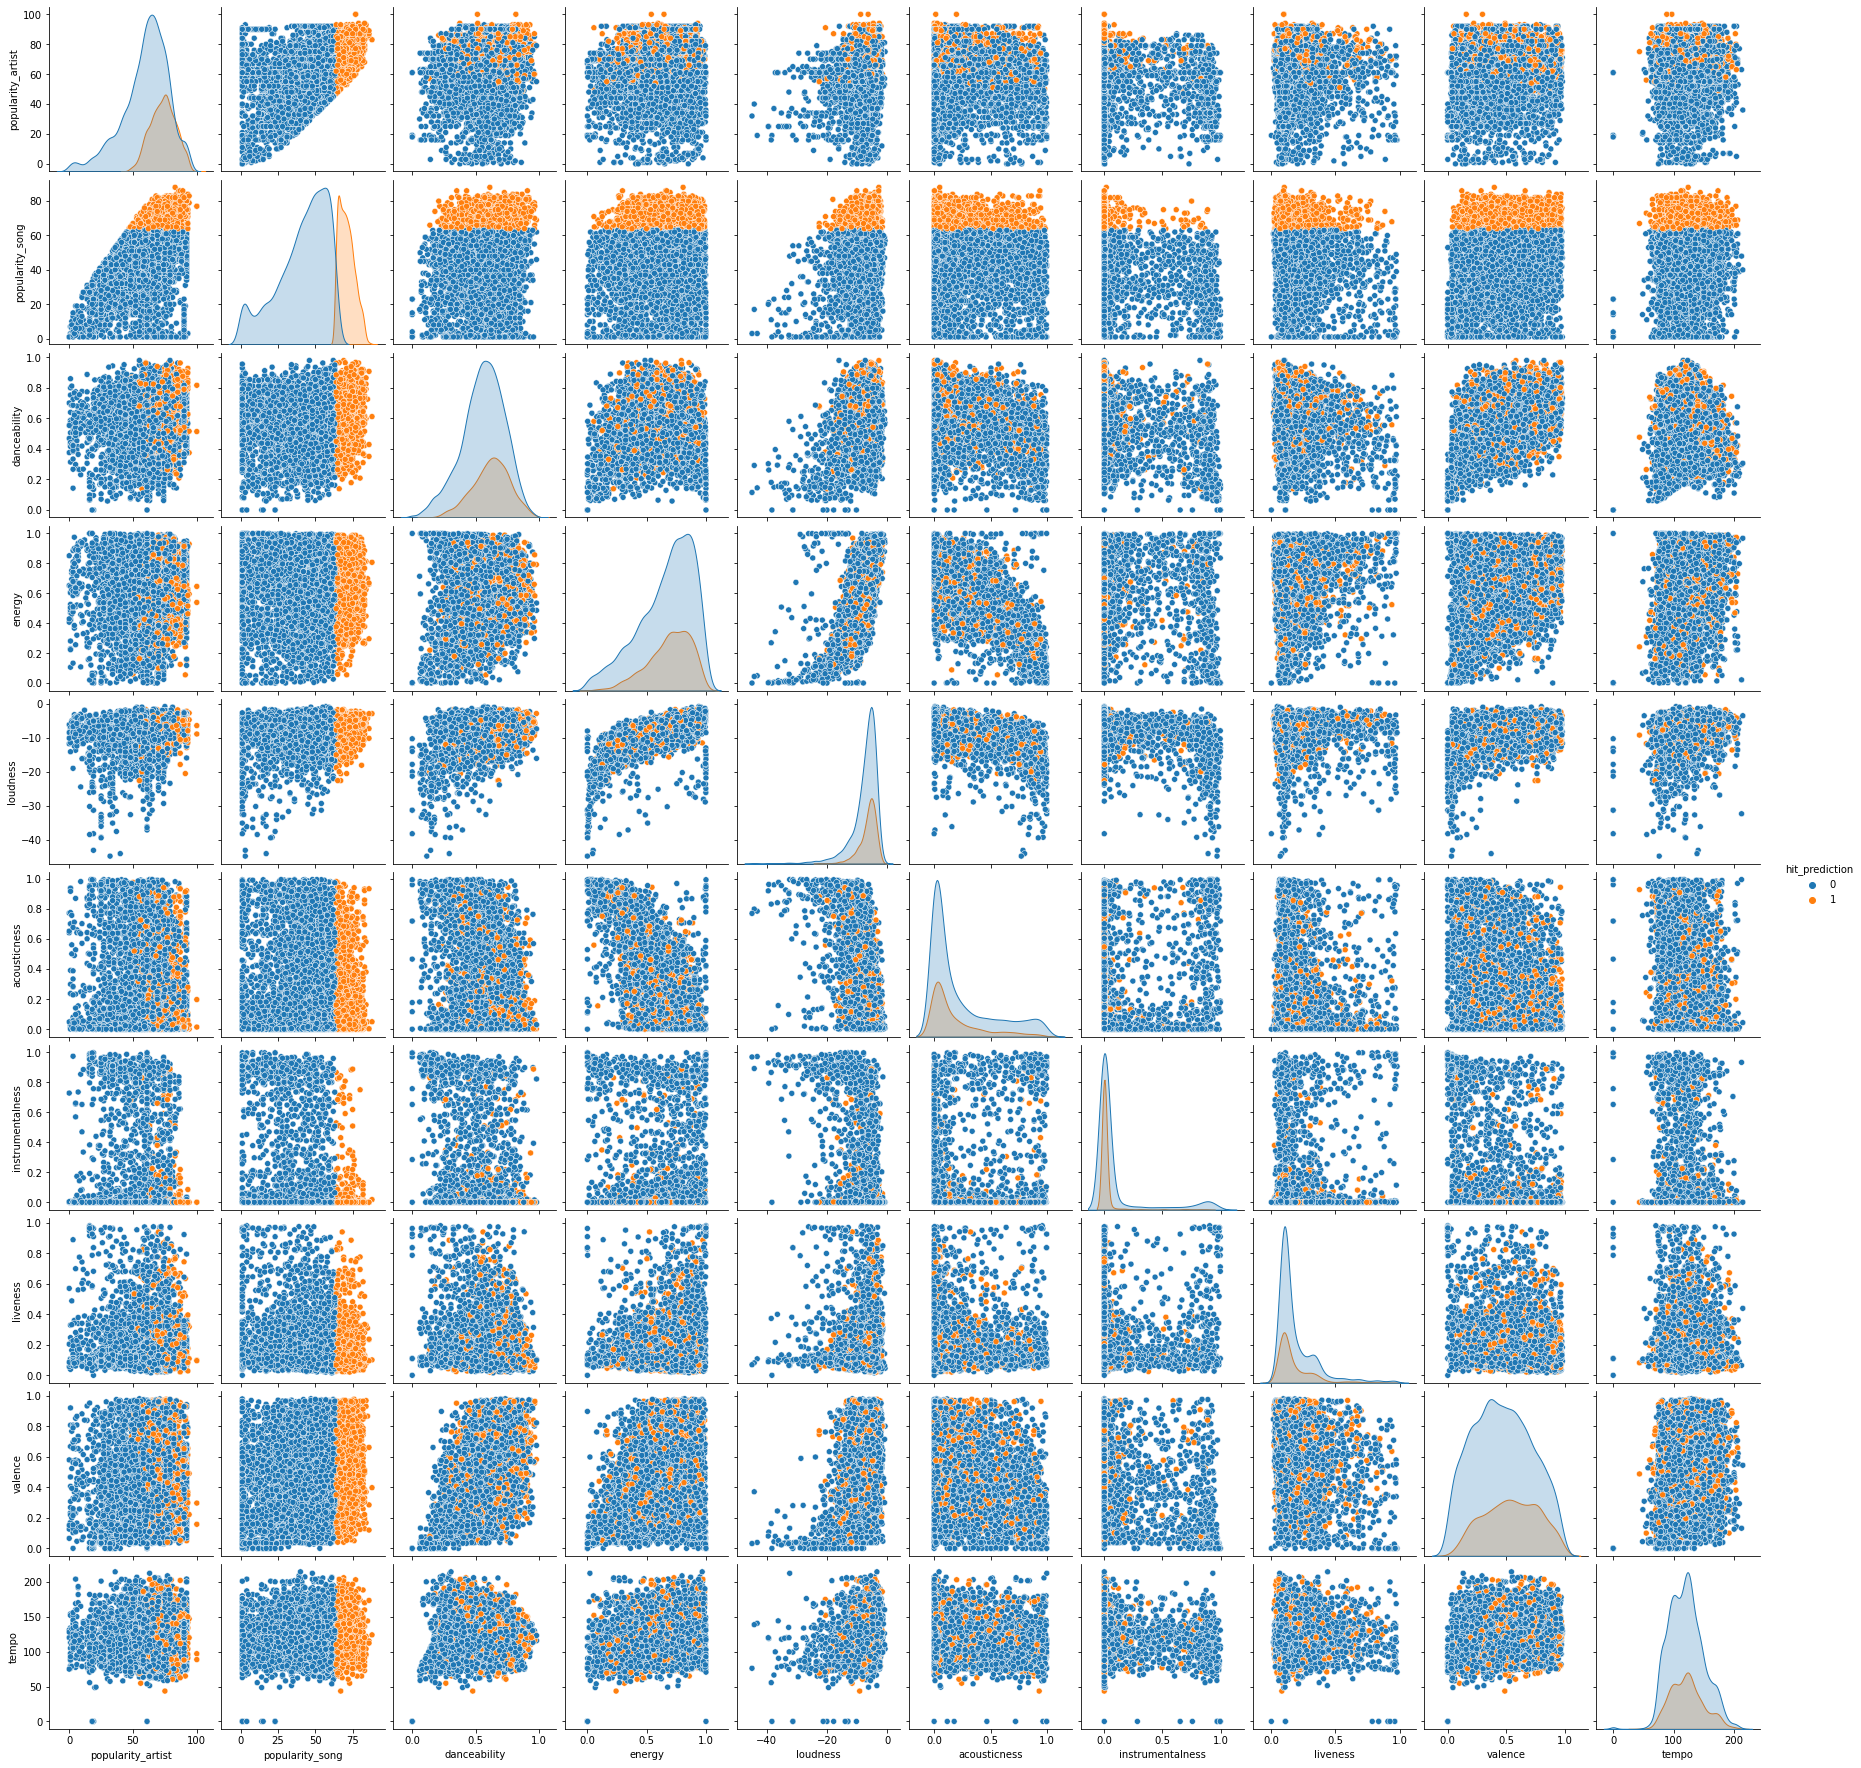

In [201]:
sns.pairplot(data=df_copy_split,hue='hit_prediction')
#plt.savefig('output.png', dpi=300, bbox_inches='tight')

In [156]:
# Target
y = df_copy_split['hit_prediction']

In [157]:
y

1       0
2       1
3       1
4       1
5       0
       ..
9915    0
9916    0
9917    0
9919    0
9920    0
Name: hit_prediction, Length: 6600, dtype: int64

In [158]:
# plot the original data, to see how target data is scattter.
#from matplotlib.colors import ListedColormap
#import matplotlib.pyplot as plt

#markers = ('s', 'x')
#colors = ('red', 'blue')
#cmap = ListedColormap(colors[:len(np.unique(y_test))])
#for idx, cl in enumerate(np.unique(y)):
#    print(idx)
#    print(cl)
#    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
#               c=cmap(idx), marker=markers[idx], label=cl)

In [159]:
# Features
#x = df_copy[['danceability', 'energy', 'key', 'loudness','mode', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature']]
X = df_copy_split.iloc[:,:-1]

In [160]:
X

popularity_artist  popularity_song  danceability  energy  loudness  \
1                    74               63         0.687   0.845    -4.370   
2                    87               78         0.818   0.803    -4.282   
3                    91               77         0.624   0.876    -3.374   
4                    91               83         0.614   0.379   -10.480   
5                    83                1         0.768   0.517    -4.323   
...                 ...              ...           ...     ...       ...   
9915                 31               18         0.435   0.583   -12.894   
9916                 44               48         0.561   0.366   -14.140   
9917                 31               25         0.391   0.590   -13.622   
9919                 67               52         0.406   0.306   -10.482   
9920                 59               45         0.362   0.507   -11.229   

      acousticness  instrumentalness  liveness  valence    tempo  
1           0.1000          0.000000    0.0452    0.809   87.972  
2           0.0340          0.000000    0.1530    0.632  106.970  
3           0.0735          0.000000    0.3270    0.781   99.943  
4           0.6070          0.000464    0.0986    0.201  107.989  
5           0.1860          0.000038    0.1040    0.418  104.992  
...            ...               ...       ...      ...      ...  
9915        0.4780          0.114000    0.1120    0.347  109.866  
9916        0.8510          0.000000    0.8130    0.646   78.659  
9917        0.6760          0.553000    0.0661    0.479  113.675  
9919        0.3130          0.007900    0.0727    0.073  135.272  
9920        0.0174          0.216000    0.1130    0.456  146.641  

[6600 rows x 10 columns]

In [161]:
X_columns = list(X)
print(X_columns)

['popularity_artist', 'popularity_song', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


In [162]:
type(X)

pandas.core.frame.DataFrame

In [163]:
type(y)

pandas.core.series.Series

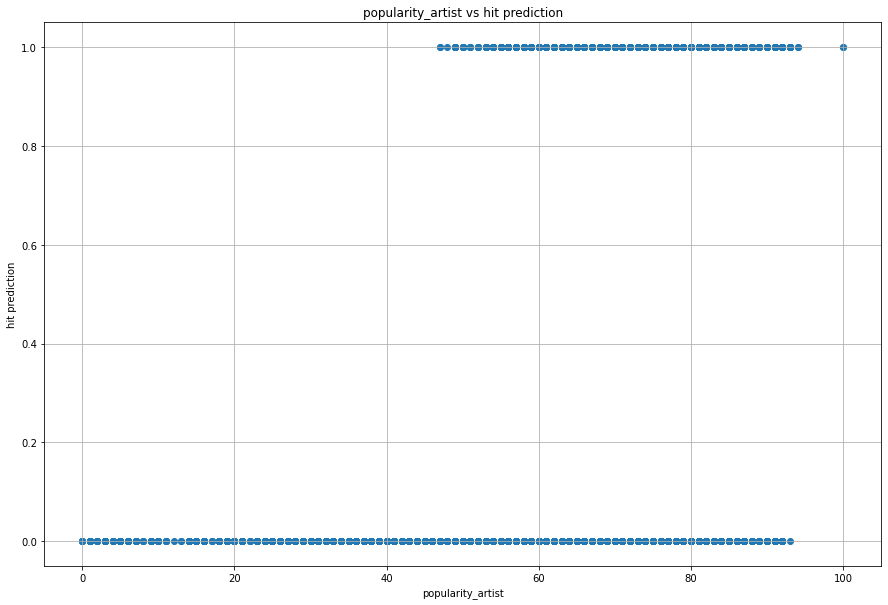

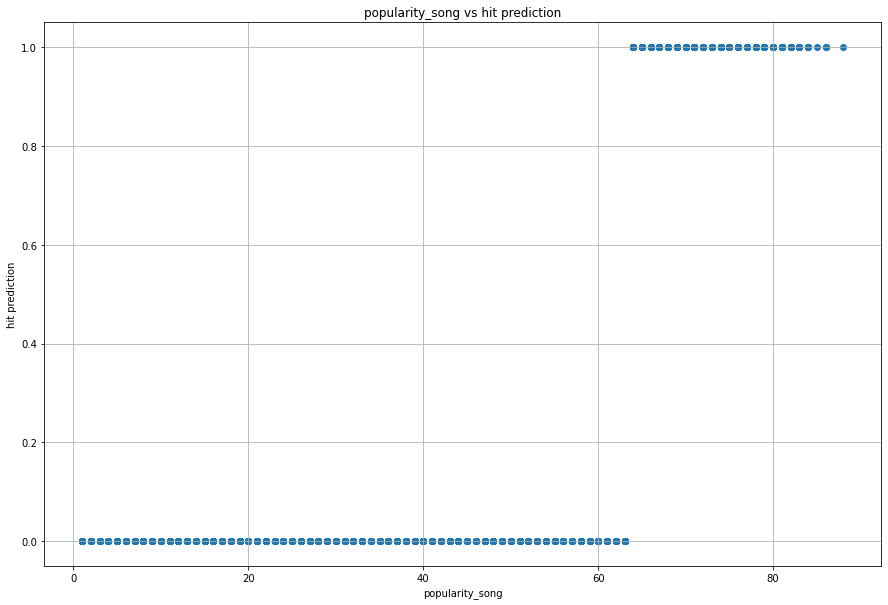

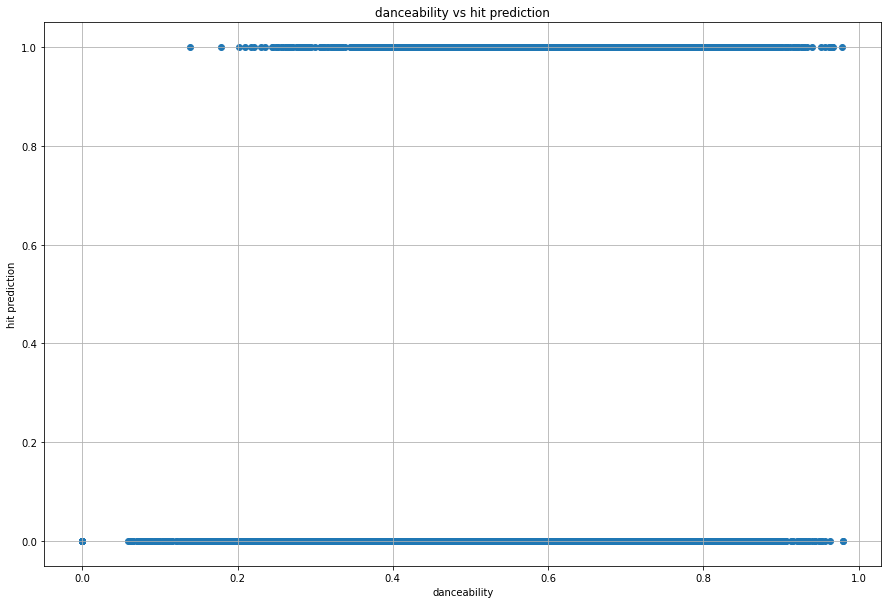

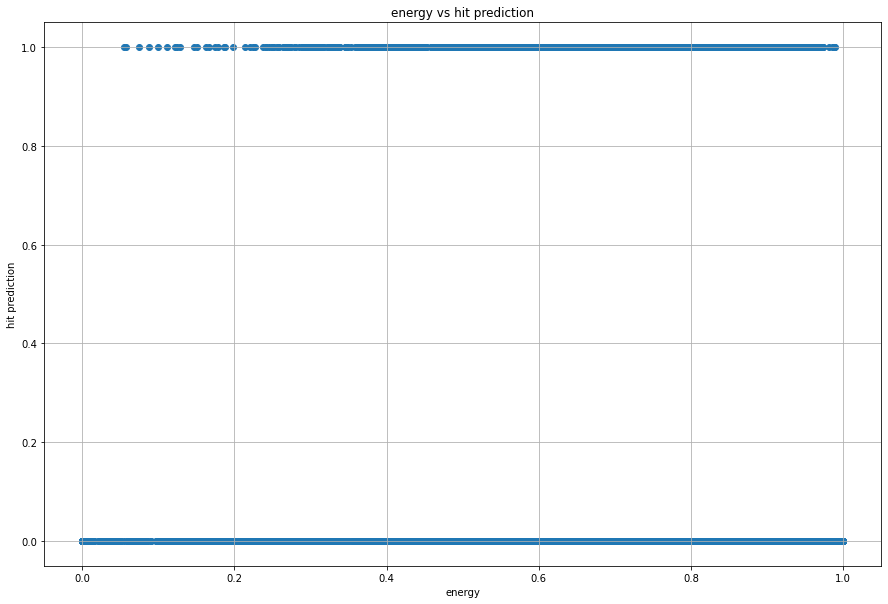

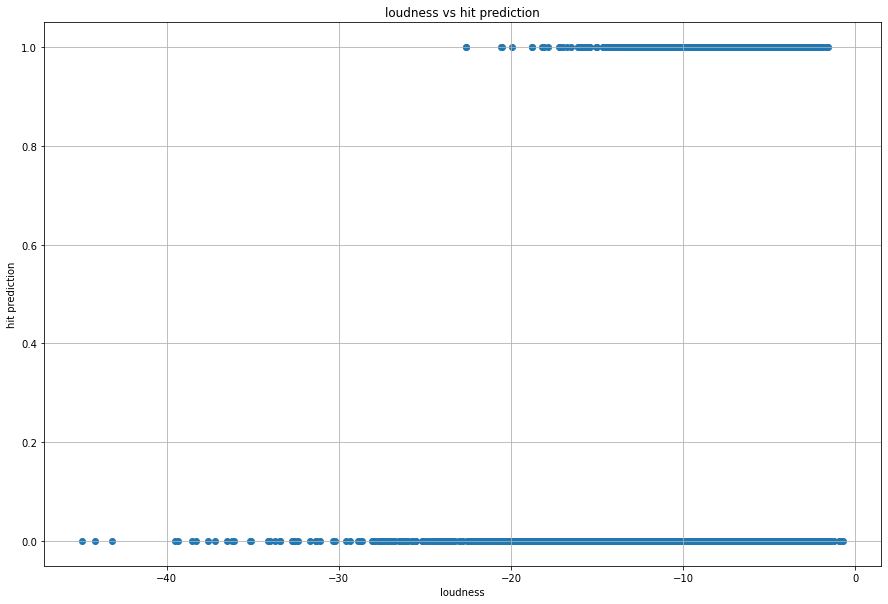

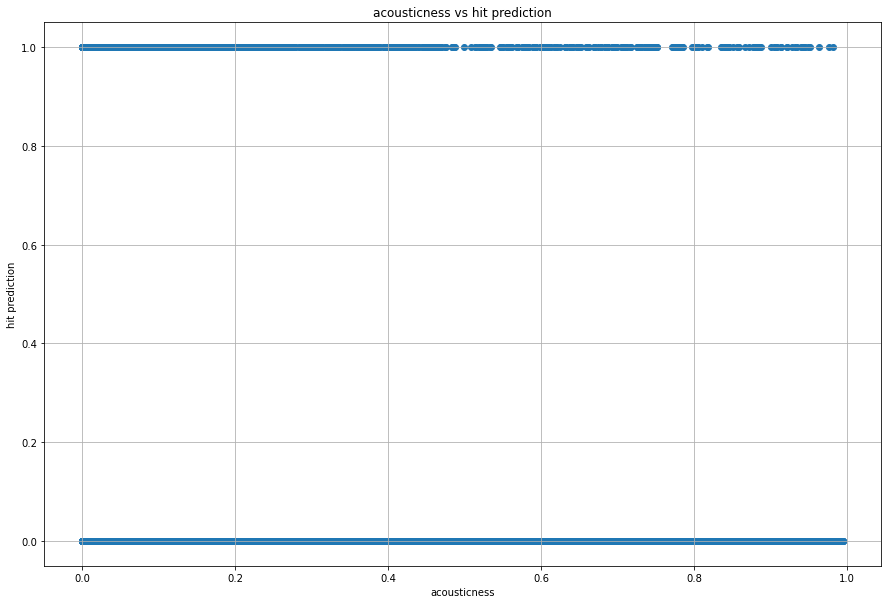

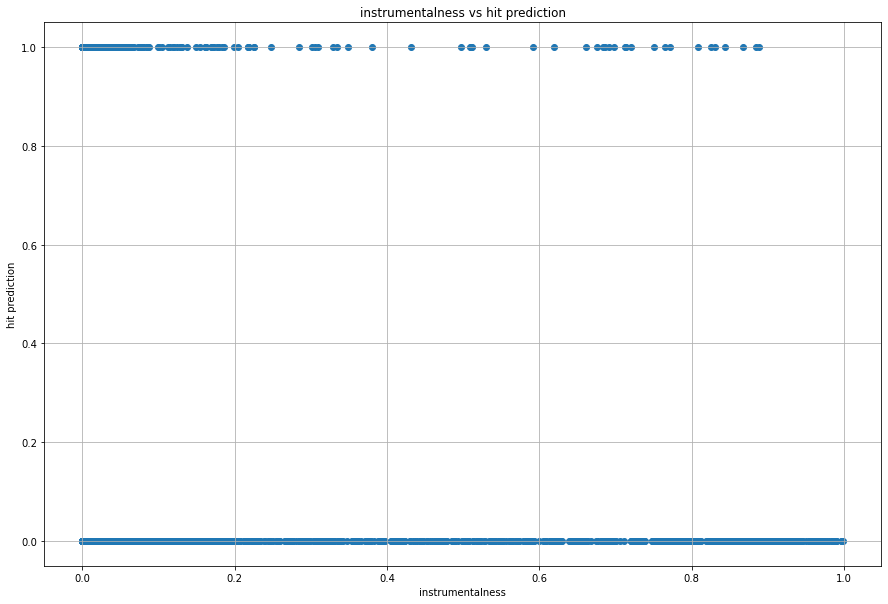

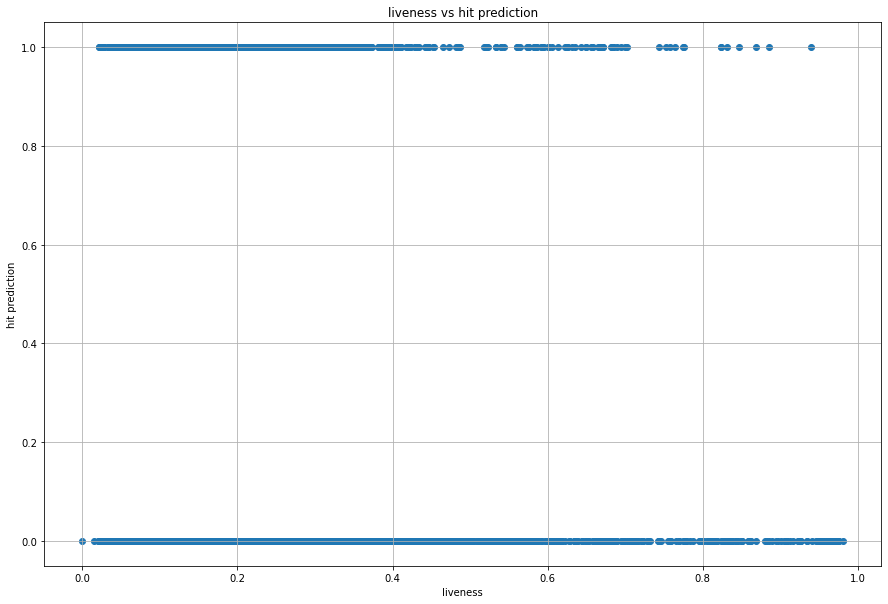

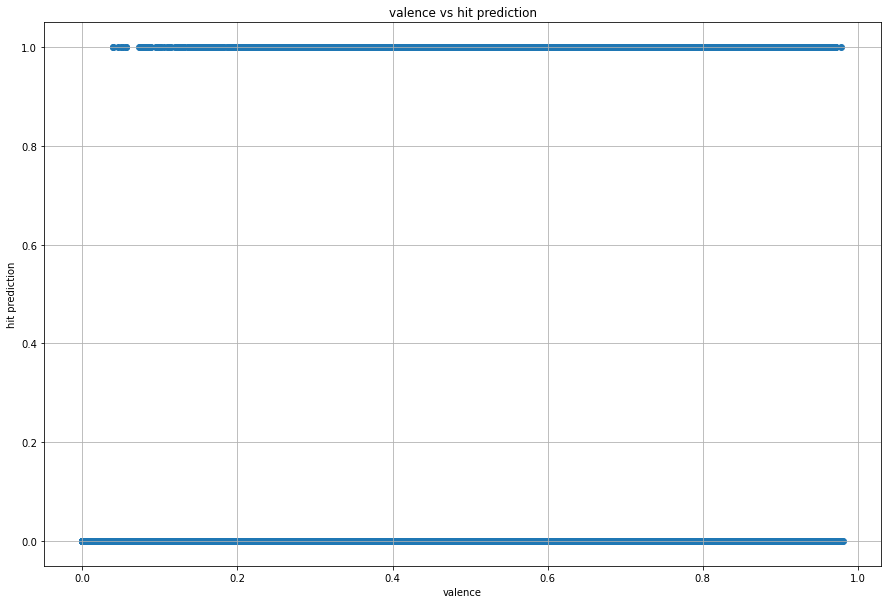

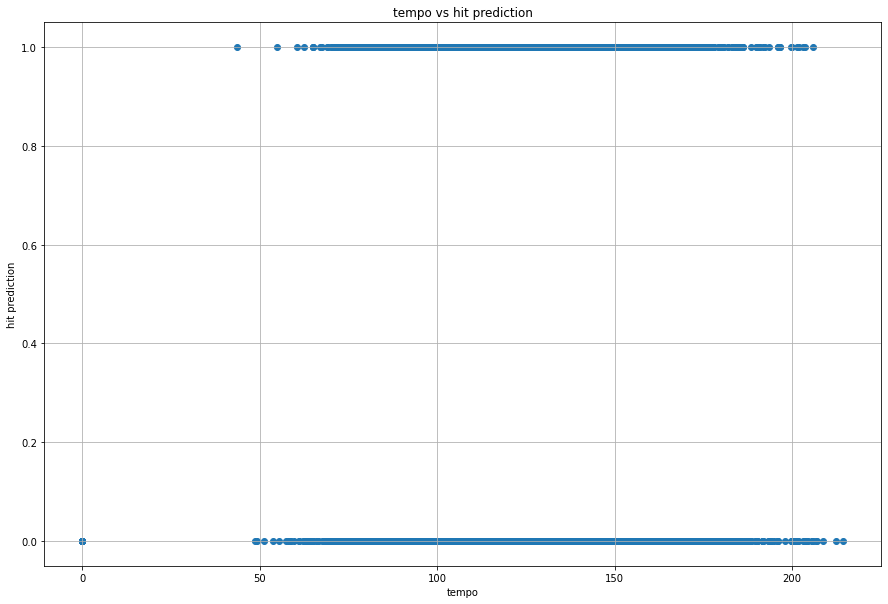

In [164]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#colors = plt.get_cmap('coolwarm', 10)
for i in X_columns:
#    print(X[i][0])
    X_value = X[i][:]
#    print(X_value)
    plt.figure(figsize=(15, 10))
    plt.scatter(X_value, y)

#    plt.plot(X_value, y, color=colors(i))
    plt.grid()
    plt.title(f"{i}"" vs hit prediction")
    plt.xlabel(i)
    plt.ylabel("hit prediction")
#    plt.show()
    plt.draw()

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 4950 samples in the training set and 1650 samples in the test set



In [166]:
type(X_train)

pandas.core.frame.DataFrame

In [167]:
X_train.head()

popularity_artist  popularity_song  danceability  energy  loudness  \
5290                 67               66         0.802   0.607   -11.028   
2807                 39               38         0.727   0.717    -6.331   
9233                 63               73         0.316   0.484    -9.110   
9441                 68               73         0.726   0.449    -9.206   
4946                 32               47         0.851   0.529   -12.201   

      acousticness  instrumentalness  liveness  valence    tempo  
5290      0.205000          0.000748    0.2460    0.274   96.916  
2807      0.212000          0.000000    0.1030    0.673  100.051  
9233      0.000334          0.004450    0.0912    0.299  117.363  
9441      0.487000          0.000001    0.0824    0.294  130.388  
4946      0.146000          0.000070    0.0656    0.926  105.865

In [168]:
type(y_train)

pandas.core.series.Series

In [169]:
#X_train = pd.DataFrame(X_train)
#X_train.plot()

In [170]:
# Features Scaling - StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [171]:
X_scaler = scaler.fit(X_train)

In [172]:
X_train_scaled = X_scaler.transform(X_train)

In [173]:
X_test_scaled = X_scaler.transform(X_test)

In [174]:
print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   popularity_artist  popularity_song  danceability    energy  loudness  \
0           0.227316         0.888508      1.401697 -0.276495 -0.850020   
1          -1.405290        -0.534830      0.946043  0.224658  0.234761   
2          -0.005913         1.244343     -1.550943 -0.836876 -0.407054   
3           0.285624         1.244343      0.939967 -0.996333 -0.429225   
4          -1.813442        -0.077329      1.699391 -0.631859 -1.120926   

   acousticness  instrumentalness  liveness   valence     tempo  
0     -0.046976         -0.364149  0.374006 -0.851124 -0.840406  
1     -0.021733         -0.367420 -0.537511  0.764233 -0.728754  
2     -0.785010         -0.347956 -0.612727 -0.749911 -0.112190  
3      0.969929         -0.367415 -0.668820 -0.770154  0.351694  
4     -0.259732         -0.367116 -0.775907  1.788507 -0.521689  


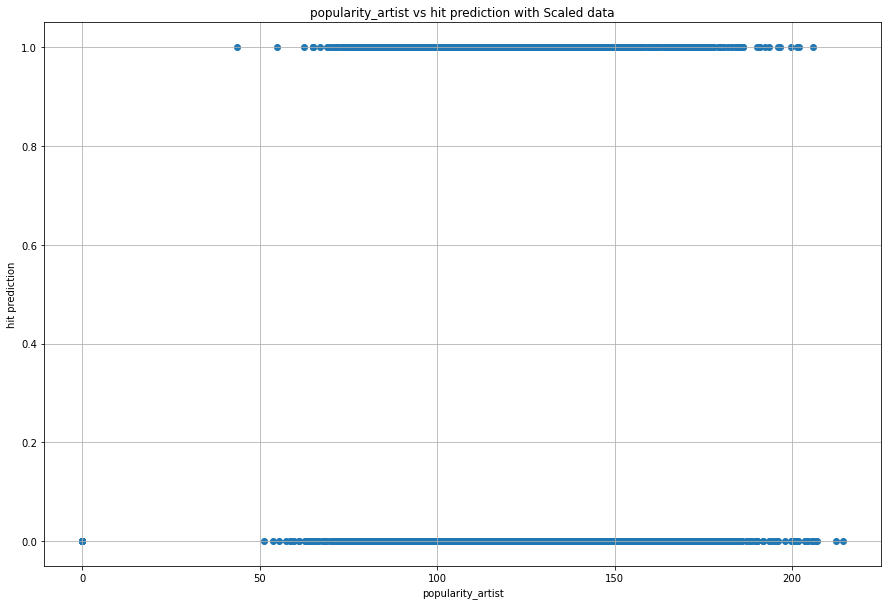

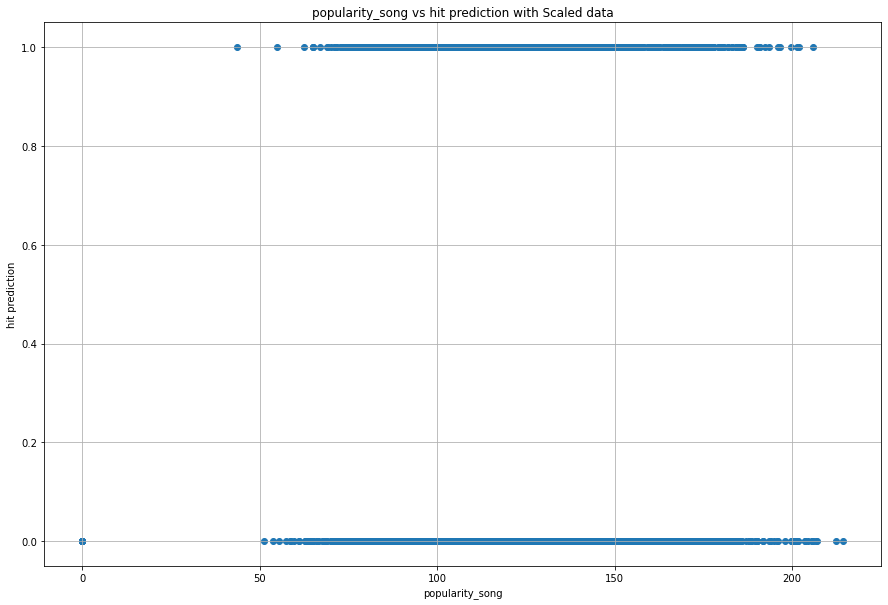

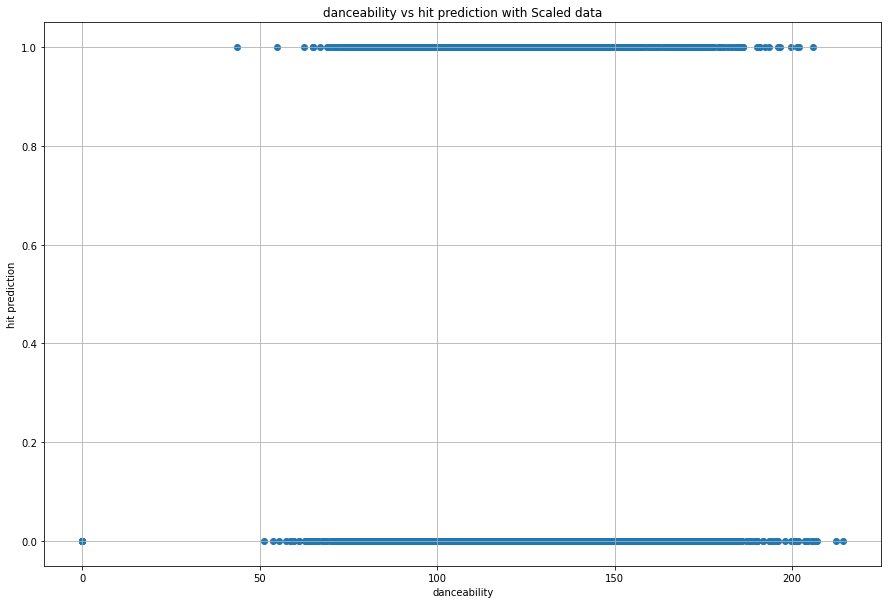

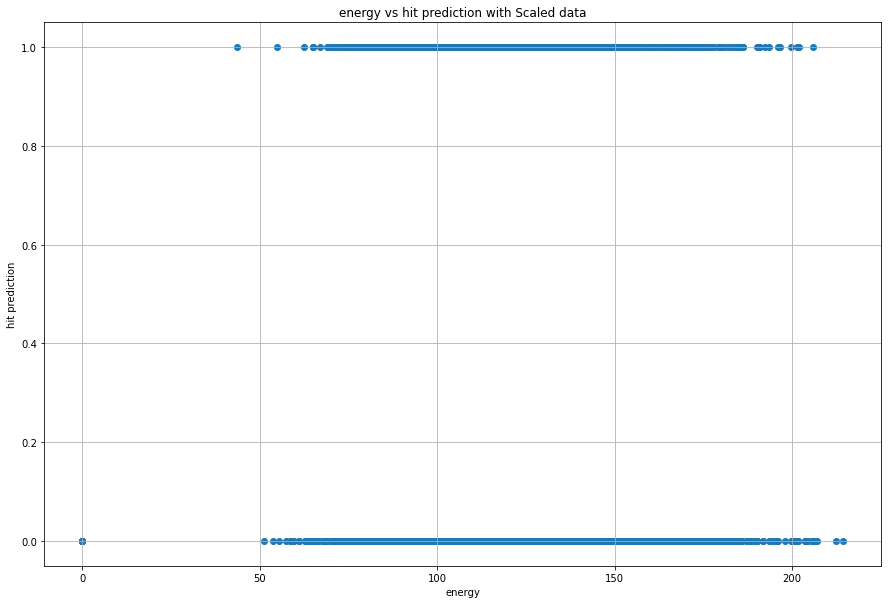

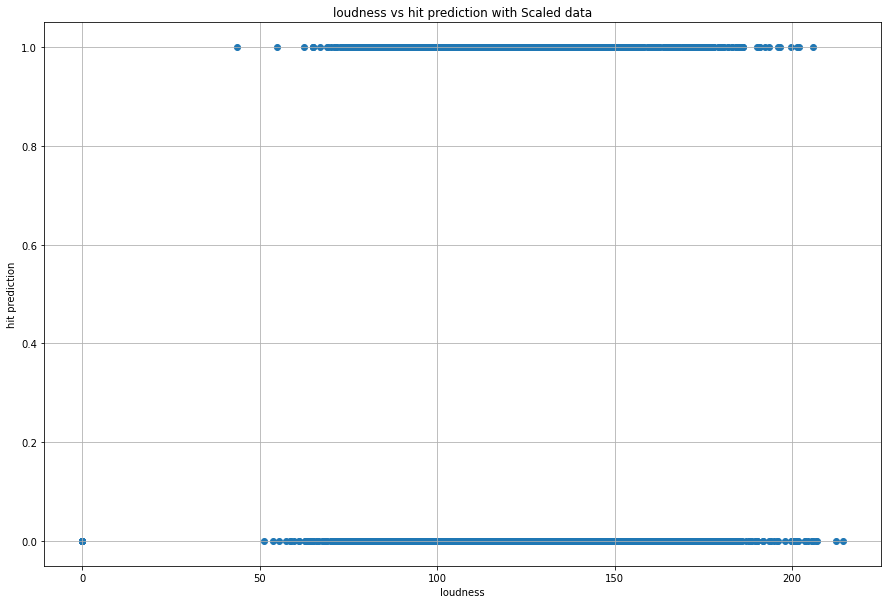

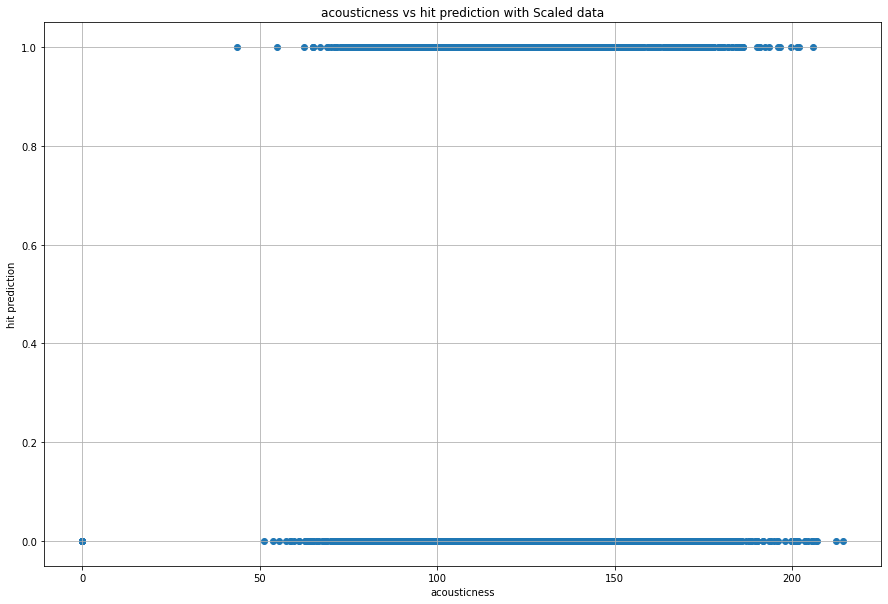

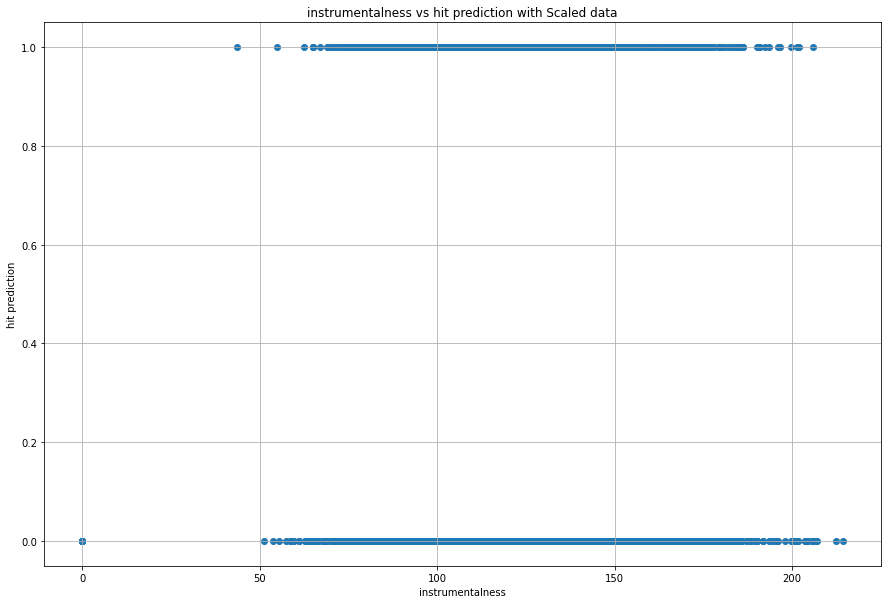

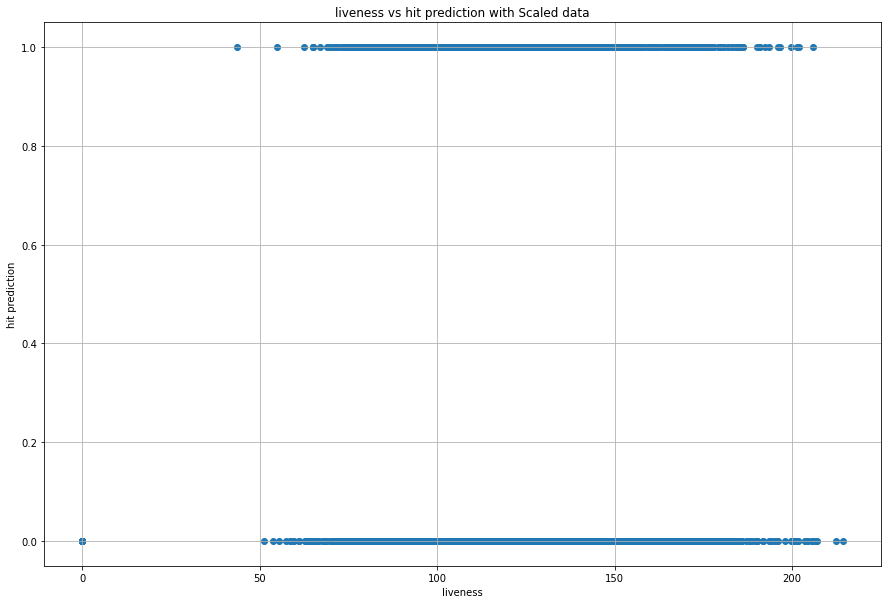

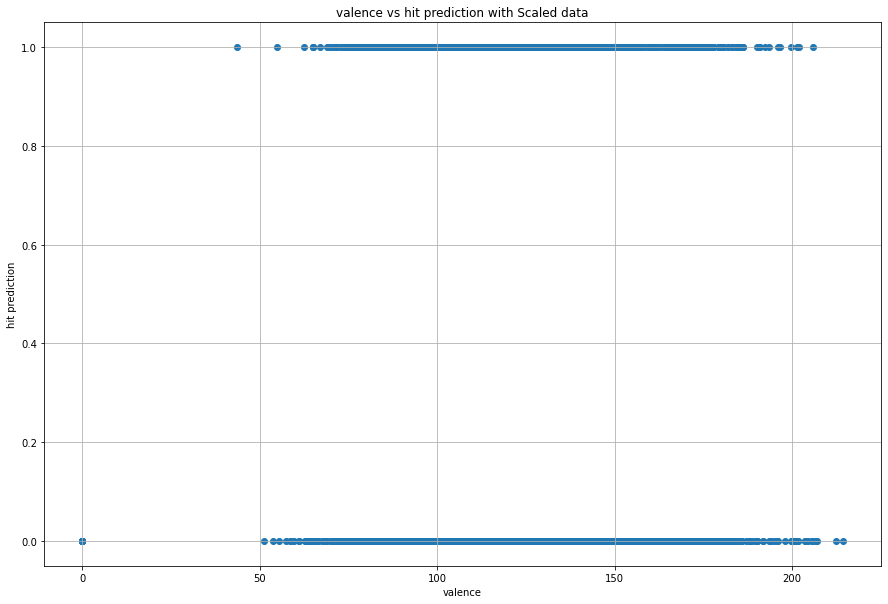

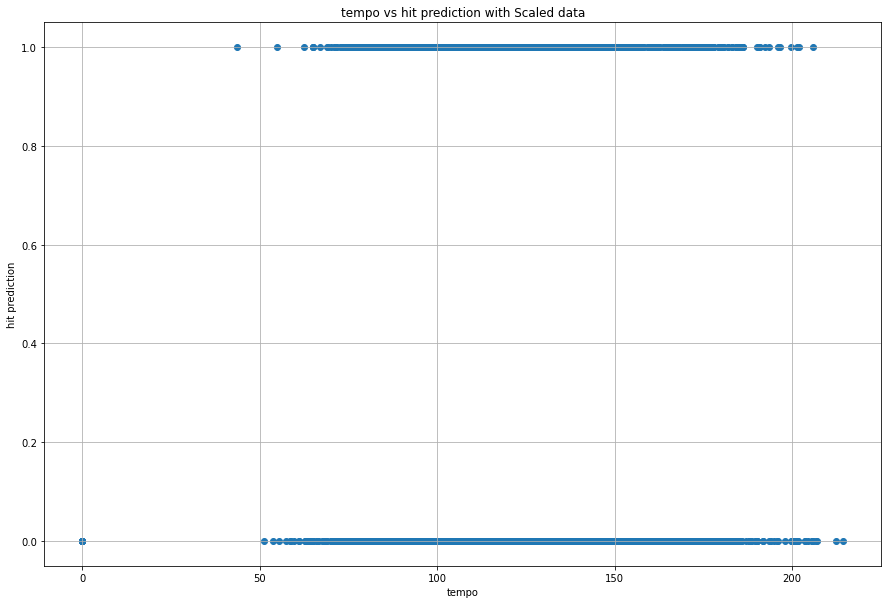

In [175]:
for j in X_columns:
#    print(X[i][0])
    X_train_value = X_train[i][:]
#    print(X_value)
    plt.figure(figsize=(15, 10))
    plt.scatter(X_train_value, y_train)

#    plt.plot(X_value, y, color=colors(i))
    plt.grid()
    plt.title(f"{j}"" vs hit prediction with Scaled data")
    plt.xlabel(j)
    plt.ylabel("hit prediction")
#    plt.show()
    plt.draw()

# Support Vector Machine - Linear

In [176]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
classifier_linear = SVC(kernel='linear')
classifier_linear

SVC(kernel='linear')

In [177]:
# Fit the data
classifier_linear.fit(X_train_scaled, y_train)
#classifier_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [178]:
# Score the accuracy
print(f"Training Data Score: {classifier_linear.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier_linear.score(X_test_scaled, y_test)}")
#print(f"Training Data Score: {classifier_linear.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier_linear.score(X_test, y_test)}")

Training Data Score: 0.9997979797979798
Testing Data Score: 0.9993939393939394


In [179]:
# Make predictions using the test data
#predictions = classifier_linear.predict(X_test_std)
y_predict = classifier_linear.predict(X_test_scaled)
results = pd.DataFrame({
    "Prediction": y_predict, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

Prediction  Actual
0           0       0
1           0       0
2           0       0
3           0       0
4           0       0

In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix_linear = confusion_matrix(y_test, y_predict)
print(confusion_matrix_linear)

[[1241    0]
 [   1  408]]


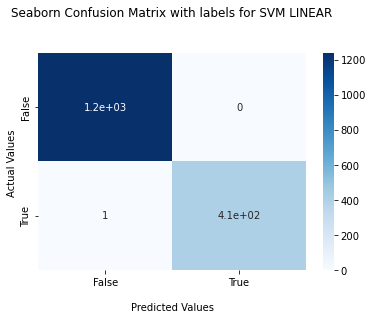

In [181]:
ax = sns.heatmap(confusion_matrix_linear, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels for SVM LINEAR\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [182]:
from sklearn.metrics import classification_report
classification_report_linear = classification_report(y_test, y_predict, target_names=["hit", "not hit"])
#print(classification_report(y_test, y_predict, target_names=["hit", "not hit"]))
print(classification_report_linear)

              precision    recall  f1-score   support

         hit       1.00      1.00      1.00      1241
     not hit       1.00      1.00      1.00       409

    accuracy                           1.00      1650
   macro avg       1.00      1.00      1.00      1650
weighted avg       1.00      1.00      1.00      1650



In [183]:
support_vector_indices = classifier_linear.support_
print(support_vector_indices)

[  30   37   52   59   70  156  191  199  235  253  289  319  367  374
  380  486  511  530  531  543  572  598  638  646  689  721  733  816
  825  874  880  883  888  909  922  936  993 1003 1025 1043 1080 1218
 1273 1300 1336 1398 1412 1456 1463 1509 1546 1584 1643 1655 1717 1769
 1796 1868 1891 1915 1957 1970 2005 2034 2059 2097 2127 2194 2216 2226
 2251 2271 2282 2337 2347 2351 2394 2398 2404 2421 2481 2497 2544 2565
 2567 2591 2665 2671 2756 2758 2805 2833 2846 2851 2852 2874 2896 2910
 2912 2963 2983 2986 3003 3004 3023 3030 3048 3051 3083 3106 3114 3128
 3159 3188 3220 3346 3365 3381 3400 3405 3412 3424 3457 3486 3523 3527
 3548 3575 3607 3608 3621 3674 3736 3740 3745 3756 3768 3781 3797 3814
 3875 3880 3901 3905 3944 3963 3994 4006 4055 4058 4061 4091 4103 4119
 4131 4147 4198 4224 4266 4278 4294 4332 4336 4341 4385 4400 4444 4448
 4462 4555 4575 4655 4660 4695 4731 4773 4802 4804 4809 4862 4871 4882
 4894 4940   22  124  141  176  193  294  340  348  358  417  426  473
  477 

In [184]:
# Get number of support vectors per class
support_vectors_per_class = classifier_linear.n_support_
print(support_vectors_per_class)

[184 174]


In [185]:
# Get support vectors themselves
support_vectors = classifier_linear.support_vectors_

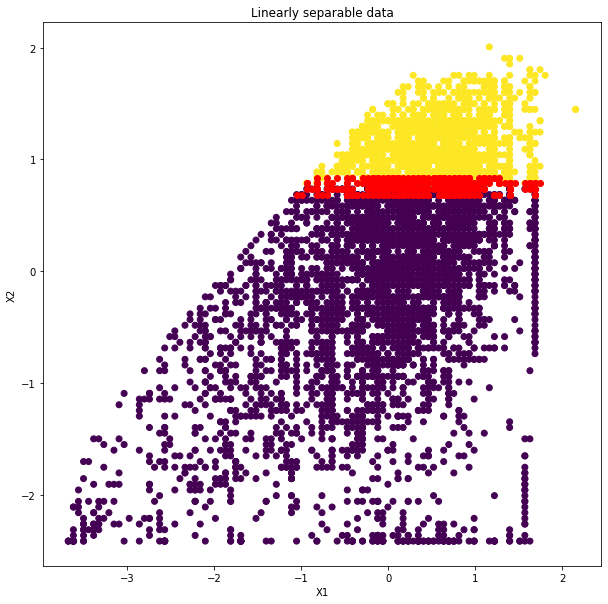

In [186]:
# Visualize support vector
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train)
#plt.scatter(X_train_scaled[:,0], c=y_train)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
#plt.scatter(support_vectors[:,0], color='red')
plt.title('Linearly separable data')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Support Vector Machine - Polynomial

In [187]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
classifier_poly = SVC(kernel='poly',degree=8)
classifier_poly

SVC(degree=8, kernel='poly')

In [188]:
# Fit the data
classifier_poly.fit(X_train_scaled, y_train)
#classifier_poly.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [189]:
# Score the accuracy
print(f"Training Data Score: {classifier_poly.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier_poly.score(X_test_scaled, y_test)}")
#print(f"Training Data Score: {classifier_poly.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier_poly.score(X_test, y_test)}")

Training Data Score: 0.8258585858585858
Testing Data Score: 0.796969696969697


In [190]:
# Make predictions using the test data
#predictions = classifier_poly.predict(X_test_std)
y_predict = classifier_poly.predict(X_test_scaled)
results = pd.DataFrame({
    "Prediction": y_predict, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

Prediction  Actual
0           0       0
1           0       0
2           0       0
3           0       0
4           0       0

In [191]:
from sklearn.metrics import confusion_matrix
confusion_matrix_poly = confusion_matrix(y_test, y_predict)
print(confusion_matrix_poly)

[[1211   30]
 [ 305  104]]


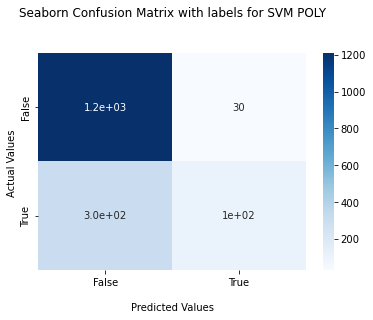

In [192]:
ax = sns.heatmap(confusion_matrix_poly, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels for SVM POLY\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [193]:
from sklearn.metrics import classification_report
classification_report_poly = classification_report(y_test, y_predict, target_names=["hit", "not hit"])
#print(classification_report(y_test, y_predict, target_names=["hit", "not hit"]))
print(classification_report_poly)

              precision    recall  f1-score   support

         hit       0.80      0.98      0.88      1241
     not hit       0.78      0.25      0.38       409

    accuracy                           0.80      1650
   macro avg       0.79      0.62      0.63      1650
weighted avg       0.79      0.80      0.76      1650



# Support Vector Machine - Gaussian (RBF)

In [194]:
# Instantiate a rbf SVM model
from sklearn.svm import SVC
classifier_rbf = SVC(kernel='rbf')
classifier_rbf

SVC()

In [195]:
# Fit the data
classifier_rbf.fit(X_train_scaled, y_train)
#classifier_rbf.fit(X_train, y_train)

SVC()

In [196]:
# Score the accuracy
print(f"Training Data Score: {classifier_rbf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier_rbf.score(X_test_scaled, y_test)}")
#print(f"Training Data Score: {classifier_rbf.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier_rbf.score(X_test, y_test)}")

Training Data Score: 0.9907070707070708
Testing Data Score: 0.983030303030303


In [197]:
# Make predictions using the test data
#predictions = classifier_poly.predict(X_test_std)
y_predict = classifier_rbf.predict(X_test_scaled)
results = pd.DataFrame({
    "Prediction": y_predict, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

Prediction  Actual
0           0       0
1           0       0
2           0       0
3           0       0
4           0       0

In [198]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rbf = confusion_matrix(y_test, y_predict)
print(confusion_matrix_rbf)

[[1227   14]
 [  14  395]]


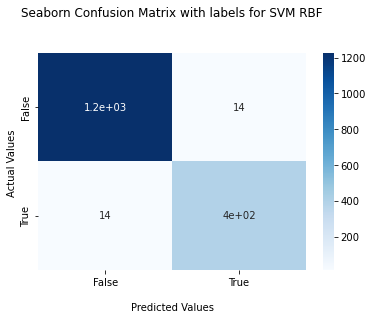

In [199]:
ax = sns.heatmap(confusion_matrix_rbf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels for SVM RBF\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [200]:
from sklearn.metrics import classification_report
classification_report_rbf = classification_report(y_test, y_predict, target_names=["hit", "not hit"])
#print(classification_report(y_test, y_predict, target_names=["hit", "not hit"]))
print(classification_report_rbf)

              precision    recall  f1-score   support

         hit       0.99      0.99      0.99      1241
     not hit       0.97      0.97      0.97       409

    accuracy                           0.98      1650
   macro avg       0.98      0.98      0.98      1650
weighted avg       0.98      0.98      0.98      1650



# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(solver='lbfgs',max_iter=10000 , random_state=20)
model2.fit(x_train, y_train)
predictions2 = model2.predict(x_test)

NameError: name 'x_train' is not defined

In [ ]:
print(f"Training Data Score: {model2.score(x_train, y_train)}")
print(f"Testing Data Score: {model2.score(x_test, y_test)}")

# Random forest

In [ ]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(x_train)

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200) 
model = model.fit(x_train_scaled, y_train)

In [ ]:
print(f"Training Data Score: {model.score(x_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(x_test_scaled, y_test)}")

In [ ]:
importances = model.feature_importances_
importances

In [ ]:
sorted(zip(model.feature_importances_, x.columns), reverse=True)
